In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr'
company_list=['FAST_data.csv','HP_data.csv','LNT_data.csv','UPS_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
all_data.shape   

(5036, 7)

In [3]:
all_data.head()

date   open   high    low   close   volume  Name
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST

In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
all_data['date']=pd.to_datetime(all_data['date'])

In [6]:
all_data['date'][0]

0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [7]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### Analyse closing price of all the stocks

In [8]:
tech_list=all_data['Name'].unique()

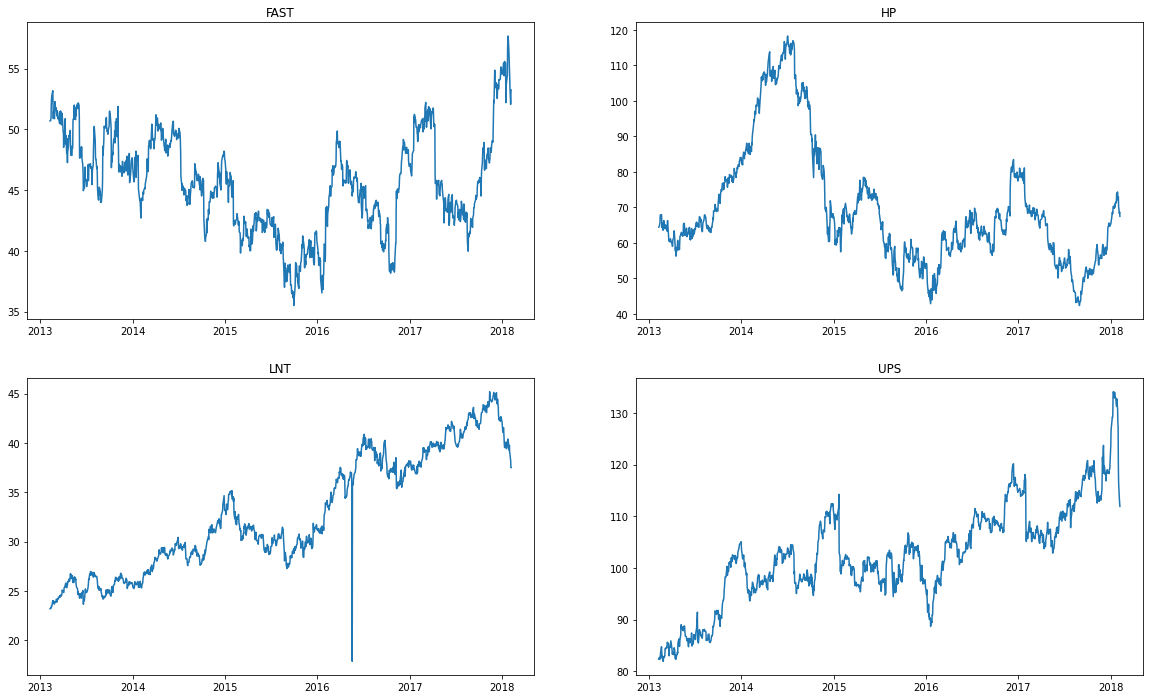

In [9]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## let's analyse the total volume of stock being traded each day using Plotly

In [10]:
import plotly.express as px

In [11]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

## Analyse Daily Price Change in Stock

In [12]:
df=pd.read_csv('C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr\\FAST_data.csv')
df.head()

date   open   high    low   close   volume  Name
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST

In [13]:
df['Daily_Price_change']=df['close']-df['open']
df.head()

date   open   high    low   close   volume  Name  Daily_Price_change
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST               0.640
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST               0.040
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST               0.230
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST               0.655
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST               0.470

### Percentage Return

In [14]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

date   open   high    low   close   volume  Name  Daily_Price_change  \
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST               0.640   
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST               0.040   
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST               0.230   
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST               0.655   
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST               0.470   

   1day % return  
0       1.262576  
1       0.078833  
2       0.450980  
3       1.259494  
4       0.895409

In [15]:
fig = px.line(df, x="date", y="1day % return", title=company)
fig.show()

### Using Matplotlib for Visualization

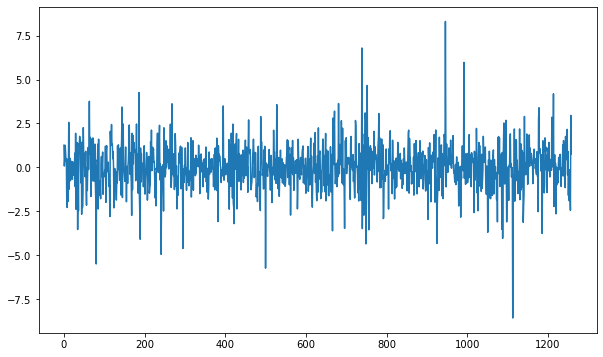

In [16]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()
plt.show()

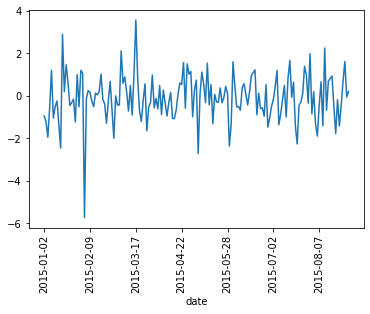

In [17]:
df.set_index('date')['2015-01-01':'2015-08-31']['1day % return'].plot()
plt.xticks(rotation='vertical')
plt.show()

#### Analyse monthly mean of close column

In [18]:
df2=df.copy()

In [19]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_change    float64
1day % return         float64
dtype: object

In [20]:
df2['date']=pd.to_datetime(df2['date'])

In [21]:
df2.set_index('date',inplace=True)

In [22]:
df2.head()

open   high    low   close   volume  Name  Daily_Price_change  \
date                                                                         
2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST               0.640   
2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST               0.040   
2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST               0.230   
2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST               0.655   
2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST               0.470   

            1day % return  
date                       
2013-02-08       1.262576  
2013-02-11       0.078833  
2013-02-12       0.450980  
2013-02-13       1.259494  
2013-02-14       0.895409

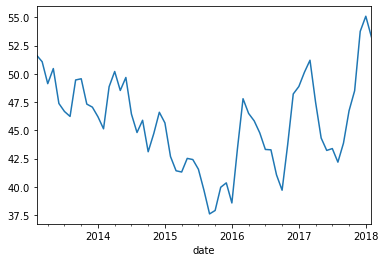

In [23]:
df2['close'].resample('M').mean().plot()
plt.show()

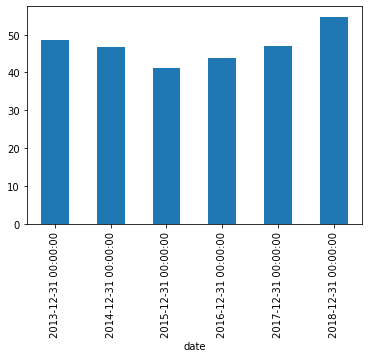

In [24]:
df2['close'].resample('Y').mean().plot(kind='bar')
plt.show()

### Checking if the Stock prices of these tech companies are correlated

#### reading data of tech companies

In [27]:
fast=pd.read_csv('C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr\\FAST_data.csv')
fast.head()

date   open   high    low   close   volume  Name
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST

In [28]:
hp=pd.read_csv('C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr\\HP_data.csv')
hp.head()

date   open   high    low  close   volume Name
0  2013-02-08  64.47  64.50  63.84  64.39  1015654   HP
1  2013-02-11  65.32  65.40  64.41  64.86  1237180   HP
2  2013-02-12  65.15  65.44  64.52  65.42   961950   HP
3  2013-02-13  65.47  65.76  65.20  65.68   848118   HP
4  2013-02-14  65.50  68.16  65.48  67.86  1387964   HP

In [29]:
lnt=pd.read_csv('C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr\\LNT_data.csv')
lnt.head()

date    open    high      low   close   volume Name
0  2013-02-08  23.140  23.210  23.0502  23.190   495972  LNT
1  2013-02-11  23.205  23.300  23.1250  23.255   530144  LNT
2  2013-02-12  23.220  23.415  23.2200  23.320   643436  LNT
3  2013-02-13  23.340  23.420  23.2250  23.305   874582  LNT
4  2013-02-14  23.265  23.560  23.1300  23.500  1191670  LNT

In [30]:
ups=pd.read_csv('C:\\Users\\admin\\Data Analysis Projects\\2-Time Series Data Analysis\\individual_stocks_5yr\\UPS_data.csv')
ups.head()

date   open    high    low  close   volume Name
0  2013-02-08  81.75  82.465  81.66  82.38  3805384  UPS
1  2013-02-11  82.11  82.730  82.11  82.69  3063846  UPS
2  2013-02-12  83.07  83.080  82.23  82.31  3941726  UPS
3  2013-02-13  82.44  82.690  82.39  82.50  2928543  UPS
4  2013-02-14  82.19  82.830  81.89  82.69  3761483  UPS

In [31]:
close=pd.DataFrame()

In [32]:
close['fast']=fast['close']
close['hp']=hp['close']
close['lnt']=lnt['close']
close['ups']=ups['close']

In [33]:
close.head()

fast     hp     lnt    ups
0  50.690  64.39  23.190  82.38
1  50.740  64.86  23.255  82.69
2  51.000  65.42  23.320  82.31
3  52.005  65.68  23.305  82.50
4  52.490  67.86  23.500  82.69

#### Multi-variate Analysis

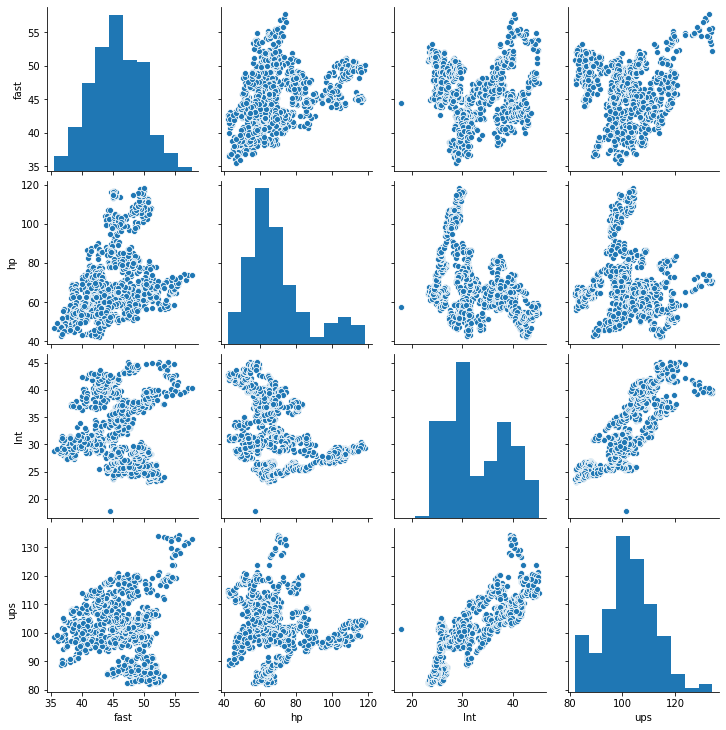

In [34]:
sns.pairplot(data=close)
plt.show()

#### co-relation plot for stock prices

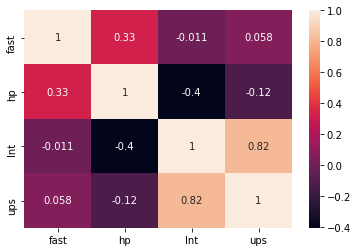

In [35]:
sns.heatmap(close.corr(),annot=True)
plt.show()

#### Analyse Daily return of each stock & how they are co-related

In [36]:
fast.head()

date   open   high    low   close   volume  Name
0  2013-02-08  50.05  50.90  49.88  50.690  1417902  FAST
1  2013-02-11  50.70  51.00  50.49  50.740  1002757  FAST
2  2013-02-12  50.77  51.41  50.75  51.000  1420902  FAST
3  2013-02-13  51.35  52.08  51.21  52.005  1324606  FAST
4  2013-02-14  52.02  52.71  51.83  52.490  1733495  FAST

In [37]:
data=pd.DataFrame()

In [38]:
data['fast_change']=((fast['close']-fast['open'])/fast['close'])*100
data['hp_change']=((hp['close']-hp['open'])/hp['close'])*100
data['lnt_change']=((lnt['close']-lnt['open'])/lnt['close'])*100
data['ups_change']=((ups['close']-ups['open'])/ups['close'])*100

In [39]:
data.head()

fast_change  hp_change  lnt_change  ups_change
0     1.262576  -0.124243    0.215610    0.764749
1     0.078833  -0.709220    0.215008    0.701415
2     0.450980   0.412718    0.428816   -0.923339
3     1.259494   0.319732   -0.150182    0.072727
4     0.895409   3.477748    1.000000    0.604668

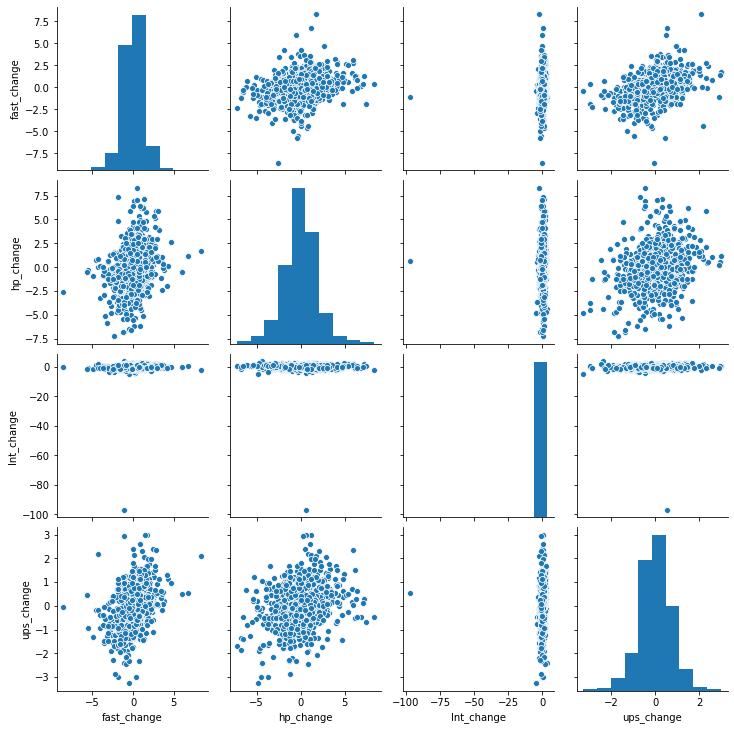

In [40]:
sns.pairplot(data=data)
plt.show()

#### Correlation plot for daily returns

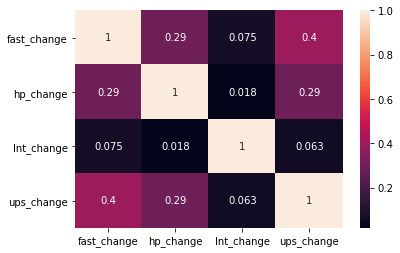

In [42]:
sns.heatmap(data.corr(),annot=True)
plt.show()

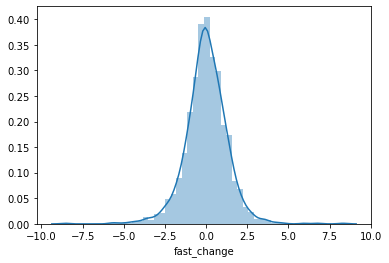

In [43]:
sns.distplot(data['fast_change'])
plt.show()

In [44]:
data['fast_change'].std()

1.2923633000426356

In [45]:
data['fast_change'].quantile(0.1)

-1.4333735205733016

In [46]:
data.describe().T

count      mean       std        min       25%       50%  \
fast_change  1259.0  0.008586  1.292363  -8.567416 -0.673742  0.019164   
hp_change    1259.0 -0.006543  1.935400  -7.260035 -1.142653  0.000000   
lnt_change   1259.0 -0.036762  2.891166 -96.922216 -0.524489  0.094607   
ups_change   1259.0  0.029073  0.754100  -3.271226 -0.409790  0.056727   

                  75%       max  
fast_change  0.749890  8.304657  
hp_change    1.088696  8.327826  
lnt_change   0.670323  3.610108  
ups_change   0.485359  2.990750